In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [191]:
df= pd.read_csv("Received_Payments_Data.csv")

In [192]:
df.shape

(93937, 16)

In [193]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [194]:
df.describe().round()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.0,9.390800e+04,93937.0,93937.0
mean,12754.0,1.583908e+11,1066470.0,531201.0
std,14274.0,3.885359e+10,1546901.0,950869.0
min,1044.0,1.421000e+10,0.0,0.0
25%,1888.0,1.470000e+11,81980.0,37663.0
50%,4003.0,1.510000e+11,405344.0,181001.0
75%,20884.0,1.690000e+11,1425606.0,599614.0
max,52940.0,2.970000e+11,10849829.0,10849829.0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [196]:
# changing date values to datetime using pandas datetime utilities

# changing column receipt date
df['RECEIPT_DATE'] = pd.to_datetime(df['RECEIPT_DATE'])

# changing column due date
df['DUE_DATE'] = pd.to_datetime(df['DUE_DATE'])

# changing column invoice creation date
df['INVOICE_CREATION_DATE'] = pd.to_datetime(df['INVOICE_CREATION_DATE'])

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

In [198]:
df.isnull().mean()

RECEIPT_METHOD           0.000000
CUSTOMER_NAME            0.000000
CUSTOMER_NUMBER          0.000000
RECEIPT_DOC_NO           0.000309
RECEIPT_DATE             0.000000
CLASS                    0.000000
CURRENCY_CODE            0.000000
Local Amount             0.000000
USD Amount               0.000000
INVOICE_ALLOCATED        0.000000
INVOICE_CREATION_DATE    0.000000
DUE_DATE                 0.000000
PAYMENT_TERM             0.000000
INVOICE_CLASS            0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_TYPE             0.000000
dtype: float64

In [199]:
# dropping column RECEIPT_DOC_NO

df.drop('RECEIPT_DOC_NO', axis=1, inplace= True)

df.head() # check rec_df

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [200]:
# Getting boolean values and Changing them to integers (1 and 0)
df['LATE_PAY'] = (df['RECEIPT_DATE'] > df['DUE_DATE']).astype(int)

# Sanity Check
df.loc[df['RECEIPT_DATE'] > df['DUE_DATE'], 'LATE_PAY'].value_counts()

1    61978
Name: LATE_PAY, dtype: int64

In [201]:
df.loc[df['RECEIPT_DATE'] <= df['DUE_DATE'], 'LATE_PAY'].value_counts() #Sanity Check

0    31959
Name: LATE_PAY, dtype: int64

In [202]:
# Sanity Check
df['LATE_PAY'].value_counts()

1    61978
0    31959
Name: LATE_PAY, dtype: int64

In [203]:
# Same number of rows as rec_df
df.LATE_PAY.value_counts().sum() == df.shape[0]
True

True

# EDA

In [204]:
# Segrigating columns

numerical_cols= ['Local Amount', 'USD Amount']

cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE',
           'INVOICE_TYPE', 'RECEIPT_METHOD']

date_cols= ['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']

target= 'LATE_PAY'

In [205]:
# Local Amount

# summarizing the column to get summary statistics

df['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

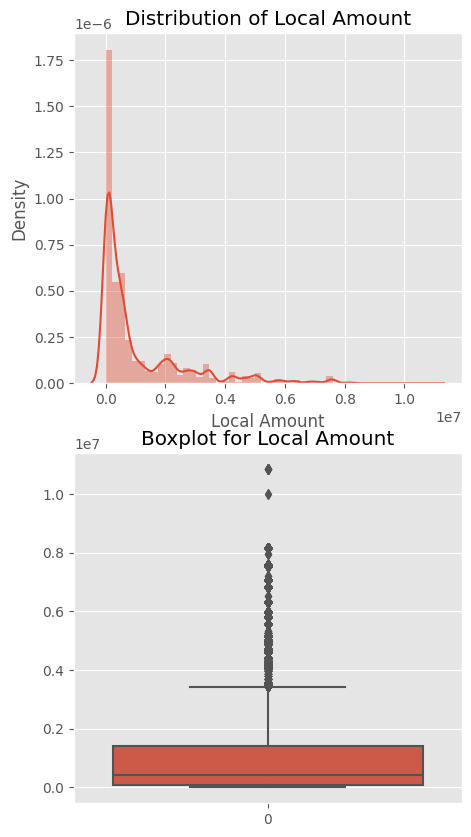

In [206]:
# Visualizing the distribution of local amount column

plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
sns.distplot(df['Local Amount'])
plt.title('Distribution of Local Amount')
plt.subplot(2,1,2)
sns.boxplot(df['Local Amount'])
plt.title('Boxplot for Local Amount')
plt.show()

In [207]:
df[df['Local Amount'] == 0].shape

(1126, 16)

In [208]:
df= df[df['Local Amount'] > 0] # Only keeping rows where local amount is greater than 0
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,LATE_PAY
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [209]:
# summarizing local amount column again

df['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

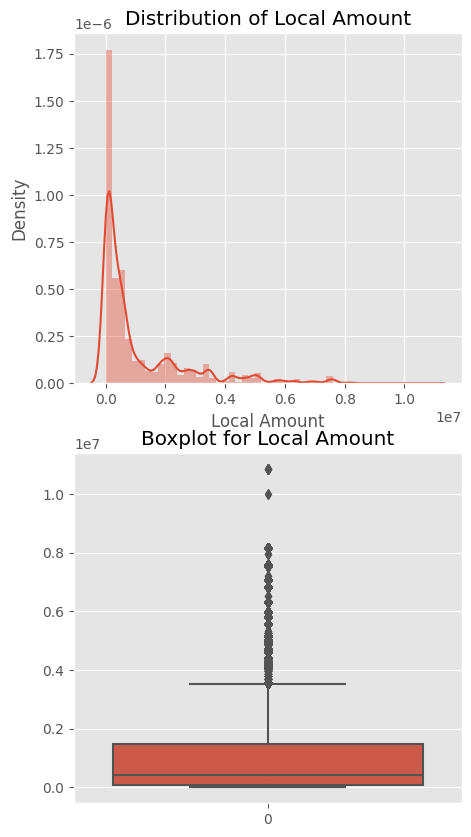

In [210]:
# Visualizing the distribution again

plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
sns.distplot(df['Local Amount'])
plt.title('Distribution of Local Amount')
plt.subplot(2,1,2)
sns.boxplot(df['Local Amount'])
plt.title('Boxplot for Local Amount')
plt.show()

In [211]:
df.drop('Local Amount', axis= 1, inplace= True) # Dropping column Local Amount

In [212]:
# USD Amount
# summarizing the column
df['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

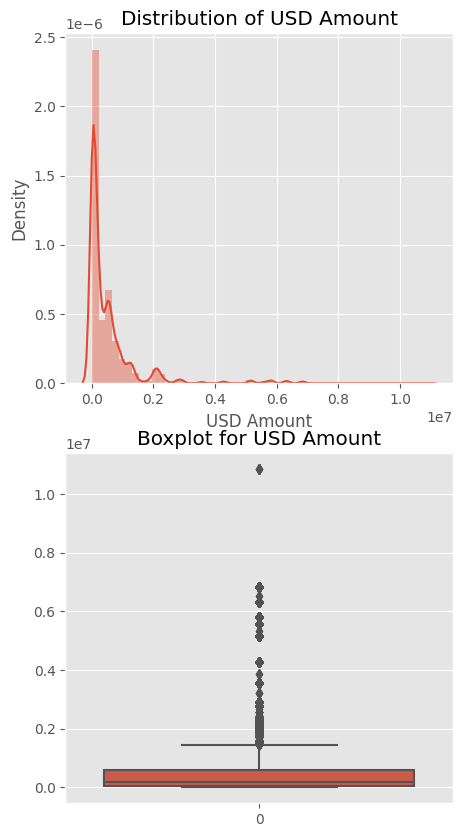

In [213]:
# Visualizing the column USD Amount

plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
sns.distplot(df['USD Amount'])
plt.title('Distribution of USD Amount')
plt.subplot(2,1,2)
sns.boxplot(df['USD Amount'])
plt.title('Boxplot for USD Amount')
plt.show()

# Categorical Columns

In [214]:
# Customer Name
# Finding the number of Unique customer names
df['CUSTOMER_NAME'].nunique()

689

In [215]:
# Top10 - FREQUENCY
# Top 10 customers on the basis of frequency of invoices
df['CUSTOMER_NAME'].value_counts().head(10)

SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: CUSTOMER_NAME, dtype: int64

In [216]:
# Top10 - AMOUNT
# Top 10 customers on the basis of invoice amounts in USD.
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(df.groupby('CUSTOMER_NAME').sum()['USD Amount'].round(0).sort_values(ascending= False).head(10))

CUSTOMER_NAME
SEPH Corp   32,533,709,059.000
FARO Corp    5,790,071,209.000
PARF Corp    3,200,510,261.000
ALLI Corp    2,580,740,593.000
AREE Corp    1,125,144,489.000
HABC Corp      534,321,619.000
RADW Corp      362,237,576.000
L OR Corp      295,550,941.000
CGR  Corp      279,516,184.000
PCD  Corp      246,606,985.000
Name: USD Amount, dtype: float64

In [217]:
# Class
# Number of Unique Classes
df['CLASS'].nunique()

1

In [218]:
# Checking value distribution, just in case
df['CLASS'].value_counts()

PMT    92811
Name: CLASS, dtype: int64

In [219]:
# Dropping CLASS column since it has no variance
df.drop('CLASS', axis= 1, inplace= True)

In [220]:
# Currency Code
# Number of Unique Currency Codes
df['CURRENCY_CODE'].nunique()

8

In [221]:
# Value distribution of currency code

df['CURRENCY_CODE'].value_counts()

AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: CURRENCY_CODE, dtype: int64

# Payment term

In [222]:
# Payment Term
# Number of unique values in Payment Term
df['PAYMENT_TERM'].nunique()

42

In [223]:
# Getting unique values for Payment Terms

df['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [224]:
# Finding top 10 payment term against frequency
df['PAYMENT_TERM'].value_counts().head(10)

60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
15 Days from EOM          7533
Immediate Payment         5468
Immediate                 4946
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: PAYMENT_TERM, dtype: int64

In [225]:
# INVOICE_CLASS
# Number of Unique items in invoice class
df['INVOICE_CLASS'].nunique()

3

In [226]:
# Distribution of invoice class
df['INVOICE_CLASS'].value_counts()

INV    87313
CM      4946
DM       552
Name: INVOICE_CLASS, dtype: int64

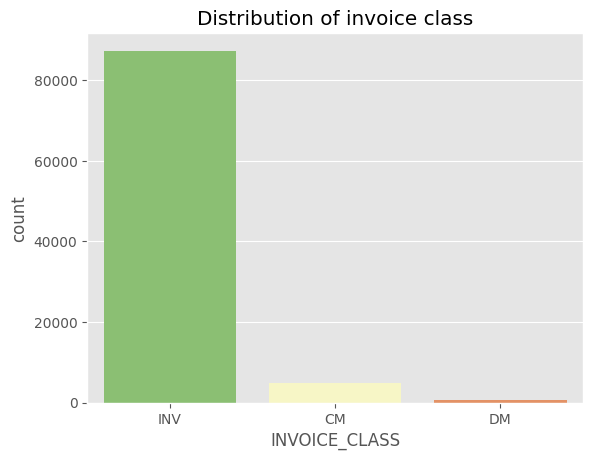

In [227]:
# visualizing the distribution of invoice class
sns.countplot(data= df, x= 'INVOICE_CLASS', palette= 'RdYlGn_r')
plt.title('Distribution of invoice class')
plt.show()

In [228]:
# Invoice Currency Code
# Checking the number of unique values
df['INVOICE_CURRENCY_CODE'].nunique()

10

In [229]:
# Distribution of invoice currency codes

df['INVOICE_CURRENCY_CODE'].value_counts()

SAR    38491
AED    32119
USD    18389
EUR     1518
KWD     1088
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: INVOICE_CURRENCY_CODE, dtype: int64

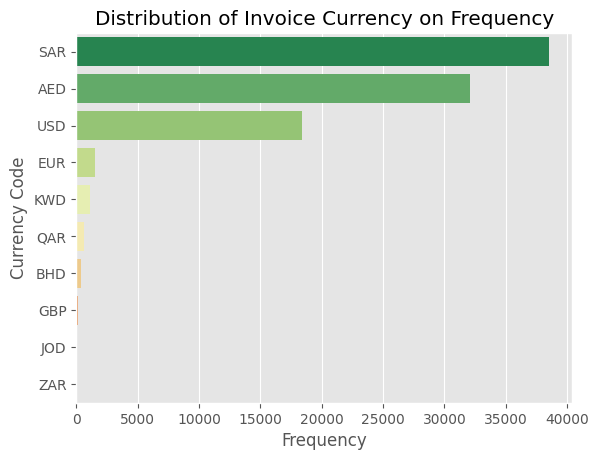

In [230]:
# Visualizing invoice currency codes as per frequency

sns.countplot(data= df, y= 'INVOICE_CURRENCY_CODE', \
              order= df['INVOICE_CURRENCY_CODE'].value_counts().index, palette= 'RdYlGn_r')

plt.title('Distribution of Invoice Currency on Frequency')

plt.ylabel('Currency Code')

plt.xlabel('Frequency')

plt.show()

In [231]:
# Invoice Type
# Number of unique values in invoice types
df['INVOICE_TYPE'].nunique()

2

In [232]:
# Distribution of Invoice Types
df['INVOICE_TYPE'].value_counts()

Goods        66569
Non Goods    26242
Name: INVOICE_TYPE, dtype: int64

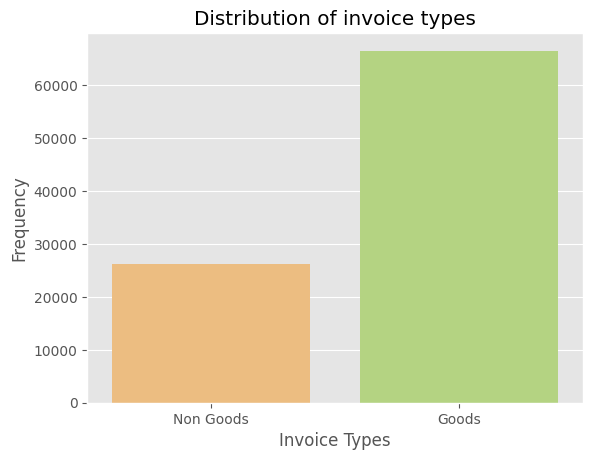

In [233]:
# Plotting the distribution of invoice types

sns.countplot(data= df, x= 'INVOICE_TYPE', palette= 'RdYlGn')

plt.title('Distribution of invoice types')

plt.xlabel('Invoice Types')

plt.ylabel('Frequency')

plt.show()

In [234]:
# Receipt Method
# number of unique values in receipt method

df['RECEIPT_METHOD'].nunique()

8

In [235]:
# Distribution of receipt methods as per frequency

df['RECEIPT_METHOD'].value_counts()

WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64

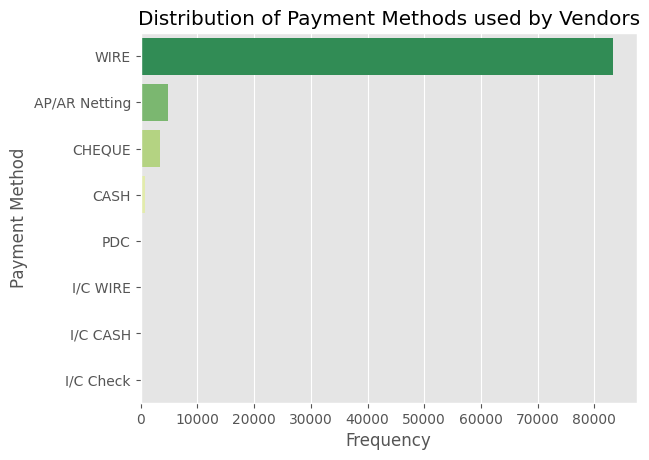

In [236]:
# Plotting the distribution of Receipt Method

sns.countplot(data= df, y= 'RECEIPT_METHOD', palette= 'RdYlGn_r')

plt.title('Distribution of Payment Methods used by Vendors')

plt.ylabel('Payment Method')

plt.xlabel('Frequency')

plt.show()

# Checking out the imbalance in dataset

In [237]:
# Checking the distribution of Target Variable
df[target].value_counts(normalize= True)

1    0.656528
0    0.343472
Name: LATE_PAY, dtype: float64

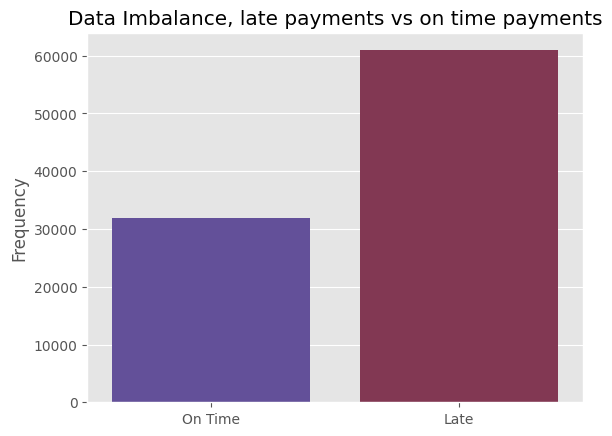

In [238]:
# plotting the distribution

sns.countplot(data= df, x= target, palette= 'twilight')

plt.title('Data Imbalance, late payments vs on time payments')

plt.xticks((0,1),('On Time','Late'))

plt.xlabel('')

plt.ylabel('Frequency')

plt.show()

# Bi-variate analysis w/ target variable

In [239]:
# Extracting months out of all creation dates

df['Month_Due'] = df['DUE_DATE'].dt.month # Extracting month from due dates
df['Month_Receipt'] = df['RECEIPT_DATE'].dt.month # Extracting month from receipt dates
df['Month_Creation'] = df['INVOICE_CREATION_DATE'].dt.month # Extracting month from invoice creation dates

In [240]:
# Number of invoices due in a month

orders_month_due = df.groupby('Month_Due').count()['DUE_DATE']
orders_month_due

Month_Due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [241]:
# effects of month in which payment is due on late payment rate

dues_late = df.groupby('Month_Due').mean()[target] # Creating a pivot table to see the effects of different months on percentage of late payments
dues_late.sort_index(ascending= True)

Month_Due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: LATE_PAY, dtype: float64

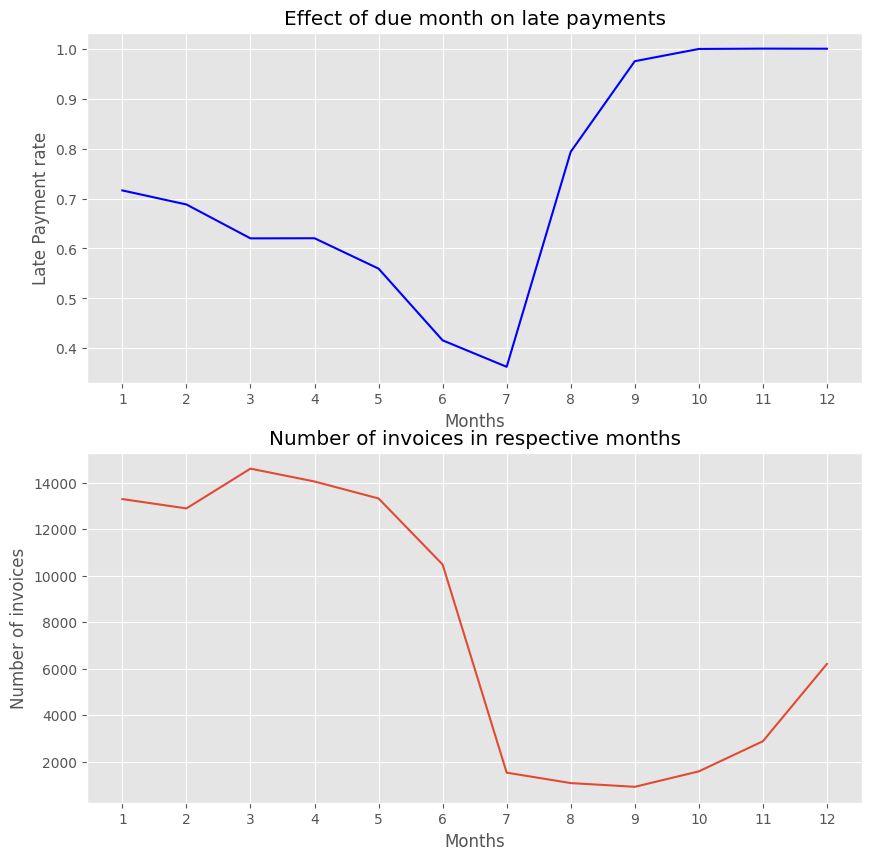

In [242]:
# Plotting the the effect of month in which the invoice is due, on the late payment rate.
plt.figure(figsize= (10,10))

plt.subplot(2,1,1)
plt.plot(dues_late, color= 'blue')

plt.title('Effect of due month on late payments')

plt.xticks([i for i in range(1,13)])

plt.xlabel('Months')

plt.ylabel('Late Payment rate')

plt.subplot(2,1,2)

plt.plot(orders_month_due)

plt.title('Number of invoices in respective months')

plt.xticks([i for i in range(1,13)])

plt.xlabel('Months')

plt.ylabel('Number of invoices')

plt.show()

In [243]:
# Receipt_date

orders_month_receipt = df.groupby('Month_Receipt').count()['DUE_DATE']  # number of payments received in a month

month_receipt = df.groupby('Month_Due').mean()[target] # out of all the payments received in month how many were

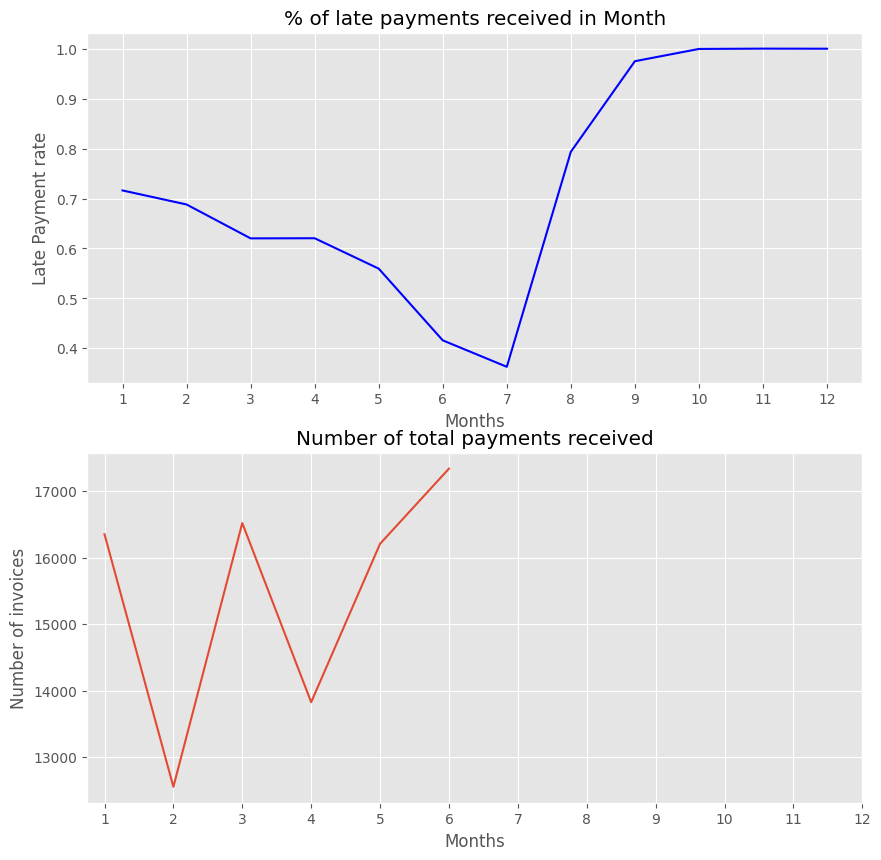

In [244]:
# Plotting the the effect of month in which the invoice is due, on the late payment rate.
plt.figure(figsize= (10,10))

plt.subplot(2,1,1)

plt.plot(month_receipt, color= 'blue')

plt.title('% of late payments received in Month')

plt.xticks([i for i in range(1,13)])

plt.xlabel('Months')

plt.ylabel('Late Payment rate')

plt.subplot(2,1,2)

plt.plot(orders_month_receipt)

plt.title('Number of total payments received')

plt.xticks([i for i in range(1,13)])

plt.xlabel('Months')

plt.ylabel('Number of invoices')

plt.show()

In [245]:
# invoice creation date

orders_month_created = df.groupby('Month_Creation').count()['DUE_DATE']  # number of invoices generated in month

month_created = df.groupby('Month_Creation').mean()[target] # out of all the invoices created % were paid late


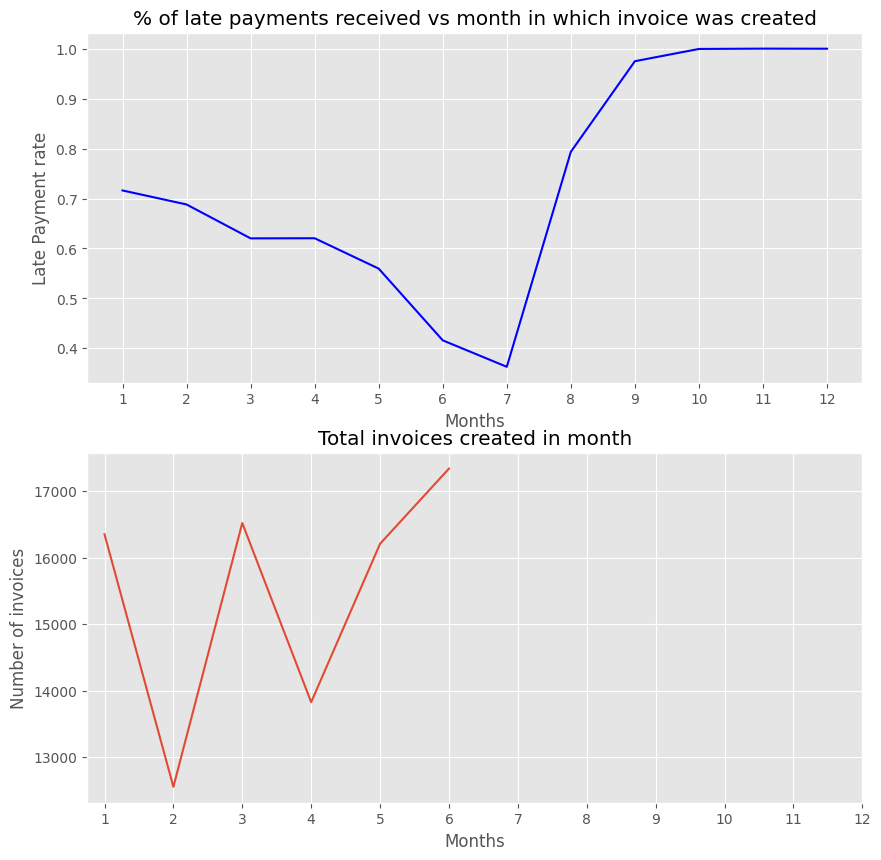

In [246]:
# Plotting the the effect of month in which the invoice is due, on the late payment rate.
plt.figure(figsize= (10,10))

plt.subplot(2,1,1)

plt.plot(month_receipt, color= 'blue')

plt.title('% of late payments received vs month in which invoice was created')

plt.xticks([i for i in range(1,13)])

plt.xlabel('Months')

plt.ylabel('Late Payment rate')

plt.subplot(2,1,2)

plt.plot(orders_month_receipt)

plt.title('Total invoices created in month')

plt.xticks([i for i in range(1,13)])

plt.xlabel('Months')

plt.ylabel('Number of invoices')

plt.show()

In [247]:
# USD Amount

usd_amount_to_late = df.pivot_table(index= target, values= 'USD Amount', aggfunc= ['mean','median',np.std]).reset_index()
usd_amount_to_late

,LATE_PAY,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


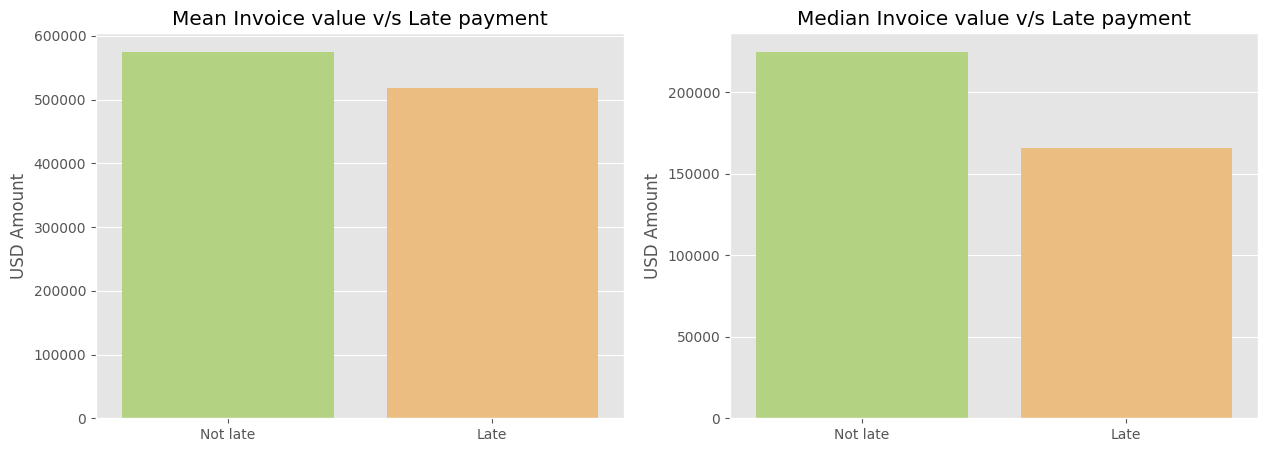

In [248]:
# plotting the difference in mean and median

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)

sns.barplot(data= usd_amount_to_late, x= 'LATE_PAY',y= ('mean', 'USD Amount'), palette= 'RdYlGn_r')

plt.title('Mean Invoice value v/s Late payment')

plt.xticks((0,1),('Not late','Late'))

plt.xlabel('')

plt.ylabel('USD Amount')

plt.subplot(1,2,2)

sns.barplot(data= usd_amount_to_late, x= 'LATE_PAY',y=('median','USD Amount'), palette= 'RdYlGn_r')

plt.xticks((0,1),('Not late','Late'))

plt.ylabel('USD Amount')

plt.xlabel('')

plt.title('Median Invoice value v/s Late payment')

plt.show()

In [249]:
# Customer Name

customer_num_of_orders= df.groupby('CUSTOMER_NAME').count()[target].sort_values(ascending= False).reset_index()
customer_num_of_orders_late= df.groupby('CUSTOMER_NAME').mean()[target].sort_values(ascending= False).reset_index()


In [250]:
# Finding out significant customers (who have more than 500 orders)

significant_custs= customer_num_of_orders[customer_num_of_orders['LATE_PAY'] > 500]['CUSTOMER_NAME']
significant_custs

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [251]:
# filtering out only significant customers' late payment rates

signi_customers_late = customer_num_of_orders_late[customer_num_of_orders_late['CUSTOMER_NAME'].isin(significant_custs)]
signi_customers_late

,CUSTOMER_NAME,LATE_PAY
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


In [252]:
# Invoice Class

invoice_class_late= df.groupby('INVOICE_CLASS').mean()[target]
invoice_class_late

INVOICE_CLASS
CM     0.976951
DM     0.884058
INV    0.636938
Name: LATE_PAY, dtype: float64

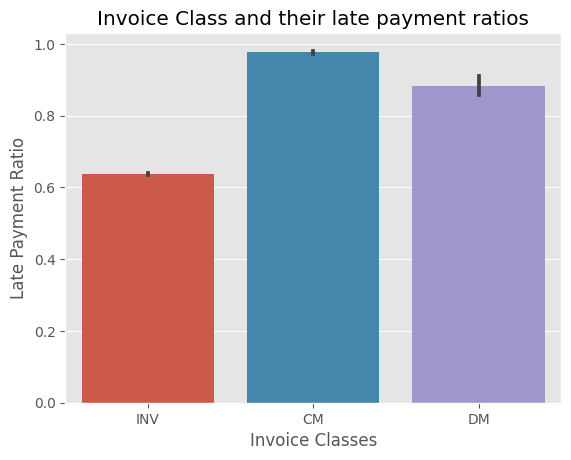

In [253]:
# plotting the relationship

sns.barplot(data= df, x= 'INVOICE_CLASS', y= target, estimator= np.mean)

plt.title('Invoice Class and their late payment ratios')

plt.xlabel('Invoice Classes')\

plt.ylabel('Late Payment Ratio')

plt.show()

In [254]:
# Invoice Type

invoice_type_late= df.groupby('INVOICE_TYPE').mean()[target]

invoice_type_late

INVOICE_TYPE
Goods        0.708137
Non Goods    0.525608
Name: LATE_PAY, dtype: float64

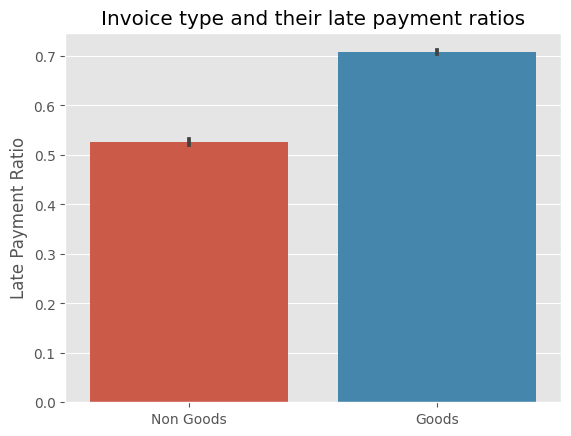

In [255]:
# plotting the relationship

sns.barplot(data= df, x= 'INVOICE_TYPE', y= target, estimator= np.mean)

plt.title('Invoice type and their late payment ratios')

plt.xlabel('')

plt.ylabel('Late Payment Ratio')

plt.show()

# Feature Engineering

In [256]:
term_cumsum= df['PAYMENT_TERM'].value_counts(normalize= True).cumsum() # Using Value counts and cumulative sum                                                            # to find the most frequent values
term_cumsum

60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date                           

In [257]:
# Both Immediate and Immediate payment provide the same information, hence merging them to immediate payment

df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : 'Immediate Payment' if x == 'Immediate' else x)

term_cumsum= df['PAYMENT_TERM'].value_counts(normalize= True).cumsum()

term_cumsum

60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date                                      0.982222
45 DAYS + EOM                                   

In [258]:
# Both 45 Days from EOM and 45 DAYS + EOM provide the same information, hence merging them to immediate payment
df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : '45 Days from EOM' if x == '45 DAYS + EOM' else x)

term_cumsum= df['PAYMENT_TERM'].value_counts(normalize= True).cumsum()

term_cumsum

60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                                  

In [259]:
# As it can be seen, around 95% of data is covered by 10 values, hence we will club the rest of the values to others in both datasets
# then we will use One Hot Encoding to encode these variables.
terms_to_keep= term_cumsum.index[:10]

In [260]:
df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : x if x in terms_to_keep else 'others')
df['PAYMENT_TERM'].value_counts() # Sanity Check

60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: PAYMENT_TERM, dtype: int64

In [261]:
term_dummies= pd.get_dummies(df['PAYMENT_TERM']).drop('others', axis=1) #Creating dummy data
df = df.join(term_dummies).drop('PAYMENT_TERM', axis=1 )
df.shape # Sanity Check

(92811, 26)

In [262]:
class_dummies= pd.get_dummies(df['INVOICE_CLASS']) #Creating dummy data
class_dummies
df = df.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

# Invoice Data

In [263]:
# Loading the current invoice dataset

curr_df= pd.read_csv('Open_Invoice_data.csv', encoding= 'latin1')

curr_df.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [264]:
curr_df.shape

(88204, 14)

In [265]:
curr_df.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [266]:
# Checking for null values

curr_df.isnull().mean()

AS_OF_DATE              0.000000
Customer Type           0.000000
Customer_Name           0.000000
Customer Account No     0.000034
Transaction Number      0.000102
Transaction Date        0.000000
Payment Term            0.000000
Due Date                0.000000
Transaction Currency    0.000000
Local Amount            0.000000
Transaction Class       0.000000
AGE                     0.000000
USD Amount              0.000000
INV_CREATION_DATE       0.000000
dtype: float64

In [267]:
# Checking datatypes

curr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [268]:
# Due date and transaction class are not in correct formats
# changing due date to datetime values
curr_df['Due Date'] = pd.to_datetime(curr_df['Due Date'])
curr_df['Due Date']

0       2021-12-21
1       2022-03-03
2       2022-04-23
3       2022-01-19
4       2022-04-30
           ...    
88199   2021-01-08
88200   2021-01-08
88201   2022-02-28
88202   2022-03-19
88203   2022-03-19
Name: Due Date, Length: 88204, dtype: datetime64[ns]

In [269]:
# changing datatype of USD Amount

curr_df['USD Amount'] = curr_df['USD Amount'].apply(lambda x : x.replace(',',''))

curr_df['USD Amount'] = curr_df['USD Amount'].astype(int)

In [270]:
# checking dtype
curr_df['USD Amount'].dtype

dtype('int64')

In [271]:
curr_df['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int64

In [272]:
# Removing negative values
curr_df = curr_df[curr_df['USD Amount'] > 0]

In [273]:
# changing invoice creation date to datetime value

curr_df['INV_CREATION_DATE'] = pd.to_datetime(curr_df['INV_CREATION_DATE'])

curr_df['INV_CREATION_DATE']

1       2022-02-01 14:09:00
2       2022-03-24 17:46:00
3       2022-01-05 11:49:00
4       2022-03-03 22:30:00
5       2022-03-03 22:30:00
                ...        
88197   2021-03-22 18:20:00
88198   2021-03-22 18:34:00
88201   2022-01-20 10:41:00
88202   2022-01-18 09:51:00
88203   2022-01-18 10:22:00
Name: INV_CREATION_DATE, Length: 79516, dtype: datetime64[ns]

In [274]:
curr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79516 entries, 1 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            79516 non-null  object        
 1   Customer Type         79516 non-null  object        
 2   Customer_Name         79516 non-null  object        
 3   Customer Account No   79516 non-null  float64       
 4   Transaction Number    79516 non-null  object        
 5   Transaction Date      79516 non-null  object        
 6   Payment Term          79516 non-null  object        
 7   Due Date              79516 non-null  datetime64[ns]
 8   Transaction Currency  79516 non-null  object        
 9   Local Amount          79516 non-null  object        
 10  Transaction Class     79516 non-null  object        
 11  AGE                   79516 non-null  int64         
 12  USD Amount            79516 non-null  int64         
 13  INV_CREATION_DAT

# Feature Engineering

In [275]:
# Keeping only the same terms as we kept in historical invoices dataframe
curr_df['Payment Term'] = curr_df['Payment Term'].apply(lambda x : x if x in terms_to_keep else 'others')
#Sanity Check
curr_df['Payment Term'].value_counts()

30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: Payment Term, dtype: int64

In [276]:
term_dummies_curr= pd.get_dummies(curr_df['Payment Term']).drop('others', axis= 1) # Creating dummies dataframe
term_dummies_curr.head()

,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0


In [277]:
# Joining the dummy data to main dataframe
curr_df= curr_df.join(term_dummies_curr).drop('Payment Term', axis= 1)
curr_df.shape

(79516, 23)

In [278]:
curr_df['Transaction Class'] = curr_df['Transaction Class'].map(lambda x : 'INV' if x=='INVOICE' else 'DM')
curr_df['Transaction Class'].value_counts()

INV    78251
DM      1265
Name: Transaction Class, dtype: int64

In [279]:
class_dummies_curr= pd.get_dummies(curr_df['Transaction Class']) #Creating dummy data
class_dummies_curr
curr_df = curr_df.join(class_dummies_curr).drop('Transaction Class', axis=1 )


In [280]:
curr_df['CM'] = 0

In [281]:
curr_df.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Due Date,Transaction Currency,Local Amount,AGE,...,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,2022-03-03,USD,"2,000",33,...,0,0,0,0,0,0,0,0,1,0
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,2022-04-23,USD,"2,000",-18,...,0,0,0,0,0,0,0,0,1,0
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,2022-01-19,AED,"2,415",76,...,0,0,0,0,0,0,0,0,1,0
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,2022-04-30,AED,"3,800",-25,...,0,0,0,0,0,0,0,0,1,0
5,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000106,03/03/2022,2022-04-30,AED,"1,264",-25,...,0,0,0,0,0,0,0,0,1,0


# Check for cols in rec and curr

In [282]:
df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'LATE_PAY', 'Month_Due', 'Month_Receipt',
       'Month_Creation', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [283]:
curr_df.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Due Date',
       'Transaction Currency', 'Local Amount', 'AGE', 'USD Amount',
       'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

# Clustering - Model Building

In [284]:
# Subtracting to find delta days
df['pay_delta_days'] = (df['RECEIPT_DATE'] - df['INVOICE_CREATION_DATE']).astype(str)
# Removing days and changing to integer
df['pay_delta_days'] = df['pay_delta_days'].apply(lambda x : x.replace(' days',''))

df['pay_delta_days'] = df['pay_delta_days'].astype(int)

df['pay_delta_days'].head()

0    169
1     33
2      1
3     47
4     47
Name: pay_delta_days, dtype: int64

In [285]:
 # Finding term by subtracting due date from invoice creation date

df['Term_days'] = (df['DUE_DATE'] - df['INVOICE_CREATION_DATE']).astype(str)

df['Term_days'] = df['Term_days'].apply(lambda x : x.replace(' days',''))

df['Term_days'] = df['Term_days'].astype(int)

df['Term_days'].head()

0    58
1    30
2    30
3    30
4    30
Name: Term_days, dtype: int64

In [286]:
# Grouping by customer name and creating dataframe that will include average and std for pay_delta

df_cluster_days = df.groupby('CUSTOMER_NAME')['pay_delta_days'].aggregate(['mean','std'])

df_cluster_days.columns= ['days_mean','days_std']

df_cluster_USD = df.groupby('CUSTOMER_NAME')['USD Amount'].aggregate(['mean','std'])

df_cluster_USD.columns= ['USD_mean','USD_std']

df_cluster_term = df.groupby('CUSTOMER_NAME')['Term_days'].aggregate(['mean','std'])
df_cluster_term.columns= ['term_mean','term_std']

df_clusters = df_cluster_days.join(df_cluster_USD).join(df_cluster_term)

df_clusters

,days_mean,days_std,USD_mean,USD_std,term_mean,term_std
CUSTOMER_NAME,,,,,,
3D D Corp,24.395349,13.040449,33590.027423,72616.633836,32.372093,15.387431
6TH Corp,40.666667,7.952987,3977.384162,1044.577231,78.444444,7.264832
A3 D Corp,45.400000,52.581366,2052.923142,0.000000,26.600000,2.190890
ABC Corp,16.000000,0.000000,19701.470000,0.000000,90.000000,0.000000
ABDU Corp,76.906250,54.919326,200272.886166,273470.655218,70.941406,30.821187
...,...,...,...,...,...,...
YOUS Corp,117.000000,33.949160,15834.963333,3554.153558,75.000000,35.032452
ZAHR Corp,144.928571,52.197059,16144.235194,5401.793704,95.785714,17.703448
ZAIN Corp,67.095238,46.326945,57555.670573,29541.647234,32.119048,17.081158


In [287]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   days_mean  689 non-null    float64
 1   days_std   603 non-null    float64
 2   USD_mean   689 non-null    float64
 3   USD_std    603 non-null    float64
 4   term_mean  689 non-null    float64
 5   term_std   603 non-null    float64
dtypes: float64(6)
memory usage: 53.8+ KB


# Outlier treatment

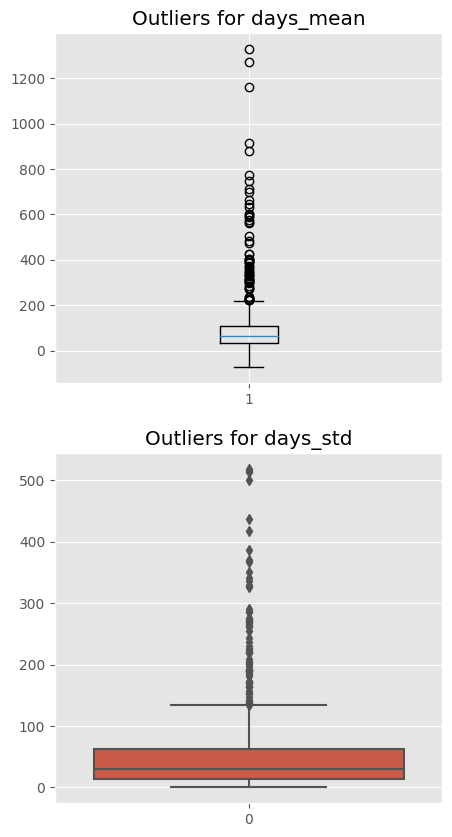

In [288]:
plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
plt.boxplot(df_clusters.days_mean)
plt.title('Outliers for days_mean')
plt.subplot(2,1,2)
sns.boxplot(df_clusters.days_std)
plt.title('Outliers for days_std')
plt.show()

In [289]:
## For both the cases we shall remove the outliers.
# removing above .99 quantile range for days_mean
q = df_clusters["days_mean"].quantile(0.99)
q

714.4400000000002

In [290]:
# removing above .99 quantile range for days_std
p = df_clusters["days_std"].quantile(0.99)
p

386.72278570453227

In [291]:
df_new = df_clusters[(df_clusters["days_mean"] < q) & (df_clusters["days_std"] <p)]
df_new

,days_mean,days_std,USD_mean,USD_std,term_mean,term_std
CUSTOMER_NAME,,,,,,
3D D Corp,24.395349,13.040449,33590.027423,72616.633836,32.372093,15.387431
6TH Corp,40.666667,7.952987,3977.384162,1044.577231,78.444444,7.264832
A3 D Corp,45.400000,52.581366,2052.923142,0.000000,26.600000,2.190890
ABC Corp,16.000000,0.000000,19701.470000,0.000000,90.000000,0.000000
ABDU Corp,76.906250,54.919326,200272.886166,273470.655218,70.941406,30.821187
...,...,...,...,...,...,...
YOUS Corp,117.000000,33.949160,15834.963333,3554.153558,75.000000,35.032452
ZAHR Corp,144.928571,52.197059,16144.235194,5401.793704,95.785714,17.703448
ZAIN Corp,67.095238,46.326945,57555.670573,29541.647234,32.119048,17.081158


In [292]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 3D D Corp to ZV F Corp
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   days_mean  591 non-null    float64
 1   days_std   591 non-null    float64
 2   USD_mean   591 non-null    float64
 3   USD_std    591 non-null    float64
 4   term_mean  591 non-null    float64
 5   term_std   591 non-null    float64
dtypes: float64(6)
memory usage: 32.3+ KB


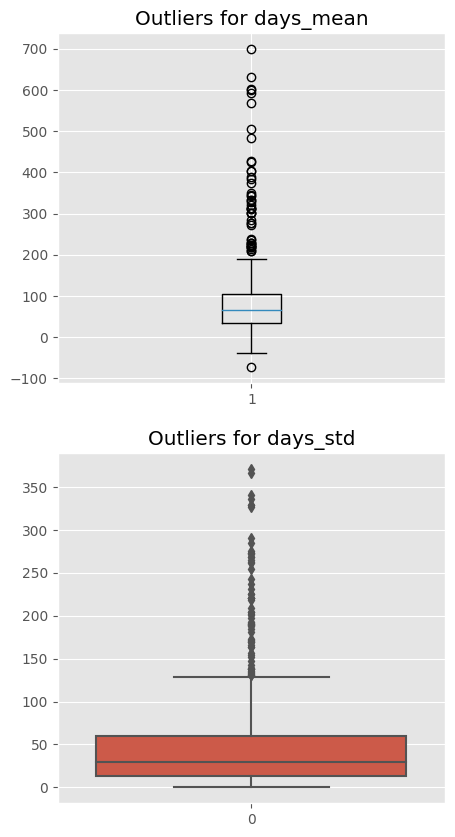

In [293]:
plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
plt.boxplot(df_new.days_mean)
plt.title('Outliers for days_mean')
plt.subplot(2,1,2)
sns.boxplot(df_new.days_std)
plt.title('Outliers for days_std')
plt.show()

# Scaling

In [294]:
df_new.describe()

,days_mean,days_std,USD_mean,USD_std,term_mean,term_std
count,591.000000,591.000000,5.910000e+02,5.910000e+02,591.000000,591.000000
mean,88.057987,53.115221,6.116612e+04,4.723406e+04,40.148550,11.573335
std,94.221147,66.474566,1.293110e+05,1.168352e+05,24.855992,13.771783
min,-73.369231,0.000000,3.316481e+02,0.000000e+00,-19.714286,0.000000
25%,34.583333,13.640046,4.752058e+03,1.024311e+03,28.925974,0.000000
50%,67.095238,29.100906,1.933045e+04,7.567710e+03,39.962264,7.724082
75%,103.988636,59.729790,6.026299e+04,4.504839e+04,55.086438,20.171900
max,699.000000,370.929128,1.409912e+06,1.524909e+06,120.000000,102.858664


In [295]:
df_new = df_new.reset_index()
df_new = df_new[['CUSTOMER_NAME','days_mean','days_std']]
df_new.head()

,CUSTOMER_NAME,days_mean,days_std
0,3D D Corp,24.395349,13.040449
1,6TH Corp,40.666667,7.952987
2,A3 D Corp,45.400000,52.581366
3,ABC Corp,16.000000,0.000000
4,ABDU Corp,76.906250,54.919326


In [296]:
# Standardization
rfm_df = df_new[['days_mean','days_std']]

# instantiate
scaler = StandardScaler()

# fit and transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [297]:
# we get an array
rfm_df_scaled.shape
# Mean for each is 0 and std dev is 1.

(591, 2)

# Hopkins Test

In [298]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [299]:
#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['days_mean', 'days_std']

In [300]:
# 0 - uniform data and 1 - highly clustered data
hopkins(rfm_df_scaled)

0.8953576473195748

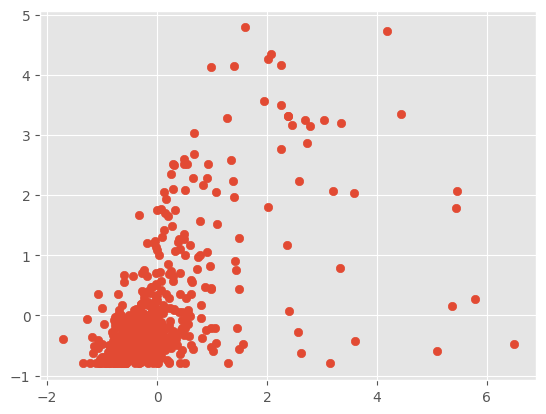

In [301]:
plt.scatter(rfm_df_scaled.days_mean , rfm_df_scaled.days_std)
plt.show()

# Modelling

In [302]:
kmeans = KMeans(n_clusters=4, max_iter= 20)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=20, n_clusters=4)

In [303]:
kmeans.labels_

array([2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2,
       2, 2, 0, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 0,
       0, 0, 2, 1, 2, 2, 1, 1, 3, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,

# Finding optimal number of clusters

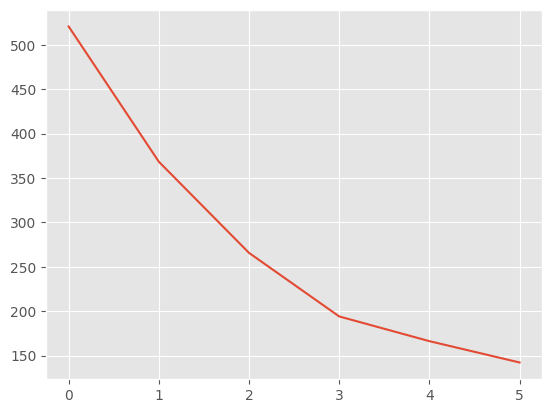

In [304]:
## Elbow method
ssd = []
clusters = [2,3,4,5,6,7]
for n in clusters:
  kmeans = KMeans(n_clusters = n , max_iter =20)
  kmeans.fit(rfm_df_scaled)
  ssd.append(kmeans.inertia_)

#plot ssd for each clusters
plt.plot(ssd)

In [305]:
## Silhoutte analysis
for n in clusters:
  kmeans = KMeans(n_clusters = n ,max_iter =30)
  kmeans.fit(rfm_df_scaled)

  cluster_labels = kmeans.labels_
  s_avg = silhouette_score(rfm_df_scaled,cluster_labels)
  print('for cluster = {0}, the silhoutte score is {1}'.format(n,s_avg))

for cluster = 2, the silhoutte score is 0.6994690167168205
for cluster = 3, the silhoutte score is 0.5991413012063203
for cluster = 4, the silhoutte score is 0.6072167059795748
for cluster = 5, the silhoutte score is 0.42600973090527383
for cluster = 6, the silhoutte score is 0.42297698252231297
for cluster = 7, the silhoutte score is 0.392715470861569


# Final clustering

In [306]:
## After analysing both, we can safely say that n_clusters = 3 or 5 for our case.
kmeans = KMeans(n_clusters=5, max_iter= 30)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=30, n_clusters=5)

In [307]:
kmeans.labels_

array([1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 4, 3, 3, 1, 3, 0, 1, 3, 3, 3, 3, 1,
       3, 0, 3, 3, 0, 2, 2, 1, 3, 2, 3, 3, 2, 0, 1, 3, 1, 1, 3, 1, 1, 1,
       0, 1, 4, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 4, 3, 1, 0, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 4, 1, 3, 1, 1, 3, 3, 0, 3,
       1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 0, 1, 3,
       2, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3,
       1, 1, 0, 2, 0, 1, 0, 3, 0, 3, 3, 1, 1, 3, 3, 1, 1, 1, 0, 3, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 3, 1, 3, 1, 4, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 3,
       2, 1, 0, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 0, 1, 0, 3, 0, 1, 3,
       1, 3, 0, 1, 4, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 0, 1, 3, 3, 4, 1, 0,
       2, 0, 3, 3, 1, 1, 3, 3, 4, 1, 0, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 0, 1, 1,

In [308]:
## CLuster value = 3
kmeans = KMeans(n_clusters=3, max_iter= 30)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=30, n_clusters=3)

In [309]:
cluster_three = kmeans.labels_

In [310]:
cluster_three

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [311]:
print(df_new.shape)
print(rfm_df_scaled.shape)

(591, 3)
(591, 2)


In [312]:
#Integrating with rec_df_cluster class to check how customers are segmented
#rec_df_new.head()
df_new['cluster_id'] = cluster_three
df_new.head(10)

,CUSTOMER_NAME,days_mean,days_std,cluster_id
0,3D D Corp,24.395349,13.040449,0
1,6TH Corp,40.666667,7.952987,0
2,A3 D Corp,45.400000,52.581366,0
3,ABC Corp,16.000000,0.000000,0
4,ABDU Corp,76.906250,54.919326,0
5,ABED Corp,14.500000,4.949747,0
6,ABEE Corp,2.000000,4.976870,0
7,ABU Corp,126.454545,137.440433,2
8,ABWA Corp,56.500000,17.108477,0
9,ACTO Corp,26.333333,53.500779,0


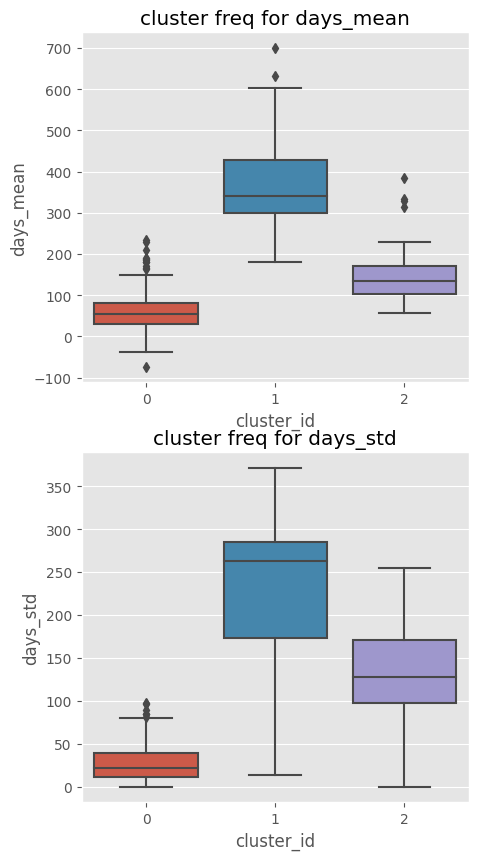

In [313]:
## frequency distribution over clusters
plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
sns.boxplot(x='cluster_id', y= 'days_mean' , data =df_new)
plt.title('cluster freq for days_mean')
plt.subplot(2,1,2)
sns.boxplot(x='cluster_id', y= 'days_std' , data =df_new)
plt.title('cluster freq for days_std')
plt.show()

# Binary Classification - Model Building

In [314]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,pay_delta_days,Term_days
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,58
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,30
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,30
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,0,0,0,0,0,0,0,1,47,30
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,0,0,0,0,0,0,0,1,47,30


In [315]:
df_new.head()

,CUSTOMER_NAME,days_mean,days_std,cluster_id
0,3D D Corp,24.395349,13.040449,0
1,6TH Corp,40.666667,7.952987,0
2,A3 D Corp,45.400000,52.581366,0
3,ABC Corp,16.000000,0.000000,0
4,ABDU Corp,76.906250,54.919326,0


In [316]:
# Merging these dataframes to add clustering index
merged = pd.merge(df , df_new ,how ='left',on='CUSTOMER_NAME')
merged.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,90 Days from Inv Date,Immediate Payment,CM,DM,INV,pay_delta_days,Term_days,days_mean,days_std,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,1,169,58,99.000000,64.490309,0.0
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,1,33,30,48.871281,51.635656,0.0
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,1,1,30,48.871281,51.635656,0.0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,0,0,0,0,1,47,30,151.122834,254.364892,2.0
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,0,0,0,0,1,47,30,48.871281,51.635656,0.0


In [317]:
# computing null values for clusters
merged['cluster_id'].isnull().sum()

1302

In [318]:
# Imputing null cluster values with 5
merged['cluster_id'].fillna(value=5,inplace=True)
merged['cluster_id'].isnull().sum()

0

In [319]:
# Converting datatype for cluster_index to int
merged['cluster_id'] = merged['cluster_id'].astype('int')
merged['cluster_id'].dtype

dtype('int64')

In [320]:
merged.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'LATE_PAY', 'Month_Due', 'Month_Receipt',
       'Month_Creation', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'pay_delta_days', 'Term_days', 'days_mean', 'days_std', 'cluster_id'],
      dtype='object')

In [321]:
reg = merged[['RECEIPT_DATE', 'USD Amount','INVOICE_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM','cluster_id']]
reg.head()

,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,2021-04-20,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2021-01-31,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2021-01-31,41991.60971,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2021-01-31,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,2
4,2021-01-31,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [322]:
reg.shape

(92811, 17)

In [323]:
reg['Reciept_Month'] = reg['RECEIPT_DATE'].dt.month
reg.drop('RECEIPT_DATE',axis=1,inplace= True)
reg.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Reciept_Month
0,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4
1,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,41991.60971,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1
4,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [324]:
reg['Invoice_Month'] = reg['INVOICE_CREATION_DATE'].dt.month
reg.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Reciept_Month,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,12


In [325]:
reg.shape

(92811, 17)

In [326]:
open_inv_reg = curr_df[['Due Date','USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM','AGE']]
open_inv_reg.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25


In [327]:
open_inv_reg['Invoice_Month'] = open_inv_reg['INV_CREATION_DATE'].dt.month
open_inv_reg.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_inv_reg.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3


In [328]:
open_inv_reg['Due_Month'] = open_inv_reg['Due Date'].dt.month
open_inv_reg.drop('Due Date',axis=1,inplace= True)
open_inv_reg.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [329]:
open_inv_reg.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

In [330]:
reg.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Reciept_Month', 'Invoice_Month'],
      dtype='object')

# Train Test Split

In [331]:
# As the target variable imbalnce is not so dominant we can directly go for train test split
# feature var in X
X = reg.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Reciept_Month,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,12


In [332]:
# Target variable in Y
y = merged['LATE_PAY']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: LATE_PAY, dtype: int64

In [333]:
# Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Reciept_Month,Invoice_Month
52625,10110.77468,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,5
29115,20469.08000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,4
80920,19816.98173,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5,12
55019,655652.78150,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,12
82266,268512.93000,0,0,0,0,0,0,1,0,0,0,0,1,0,2,1,12


# Feature Scaling

In [334]:
X_train.shape

(64967, 17)

In [335]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Reciept_Month,Invoice_Month
52625,-0.553331,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,5
29115,-0.542467,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,4
80920,-0.543151,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5,12
55019,0.123734,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,12
82266,-0.282310,0,0,0,0,0,0,1,0,0,0,0,1,0,2,1,12


In [336]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Reciept_Month,Invoice_Month
count,6.496700e+04,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,-4.702901e-18,0.080487,0.121154,0.151369,0.042052,0.037973,0.135115,0.211892,0.042314,0.024289,0.112057,0.006142,0.940831,0.053027,1.120061,3.573845,5.455354
std,1.000008e+00,0.272048,0.326308,0.358411,0.200710,0.191133,0.341849,0.408652,0.201306,0.153947,0.315439,0.078128,0.235942,0.224089,1.062536,1.743519,4.073434
min,-5.639339e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,-5.215070e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,-3.638550e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,4.000000
75%,6.495879e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,10.000000
max,1.081571e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,12.000000


# Class imbalance

In [337]:
# Checking the distribution of Target Variable

y.value_counts(normalize= True)

#65-35 percent class value can be worked with.

1    0.656528
0    0.343472
Name: LATE_PAY, dtype: float64

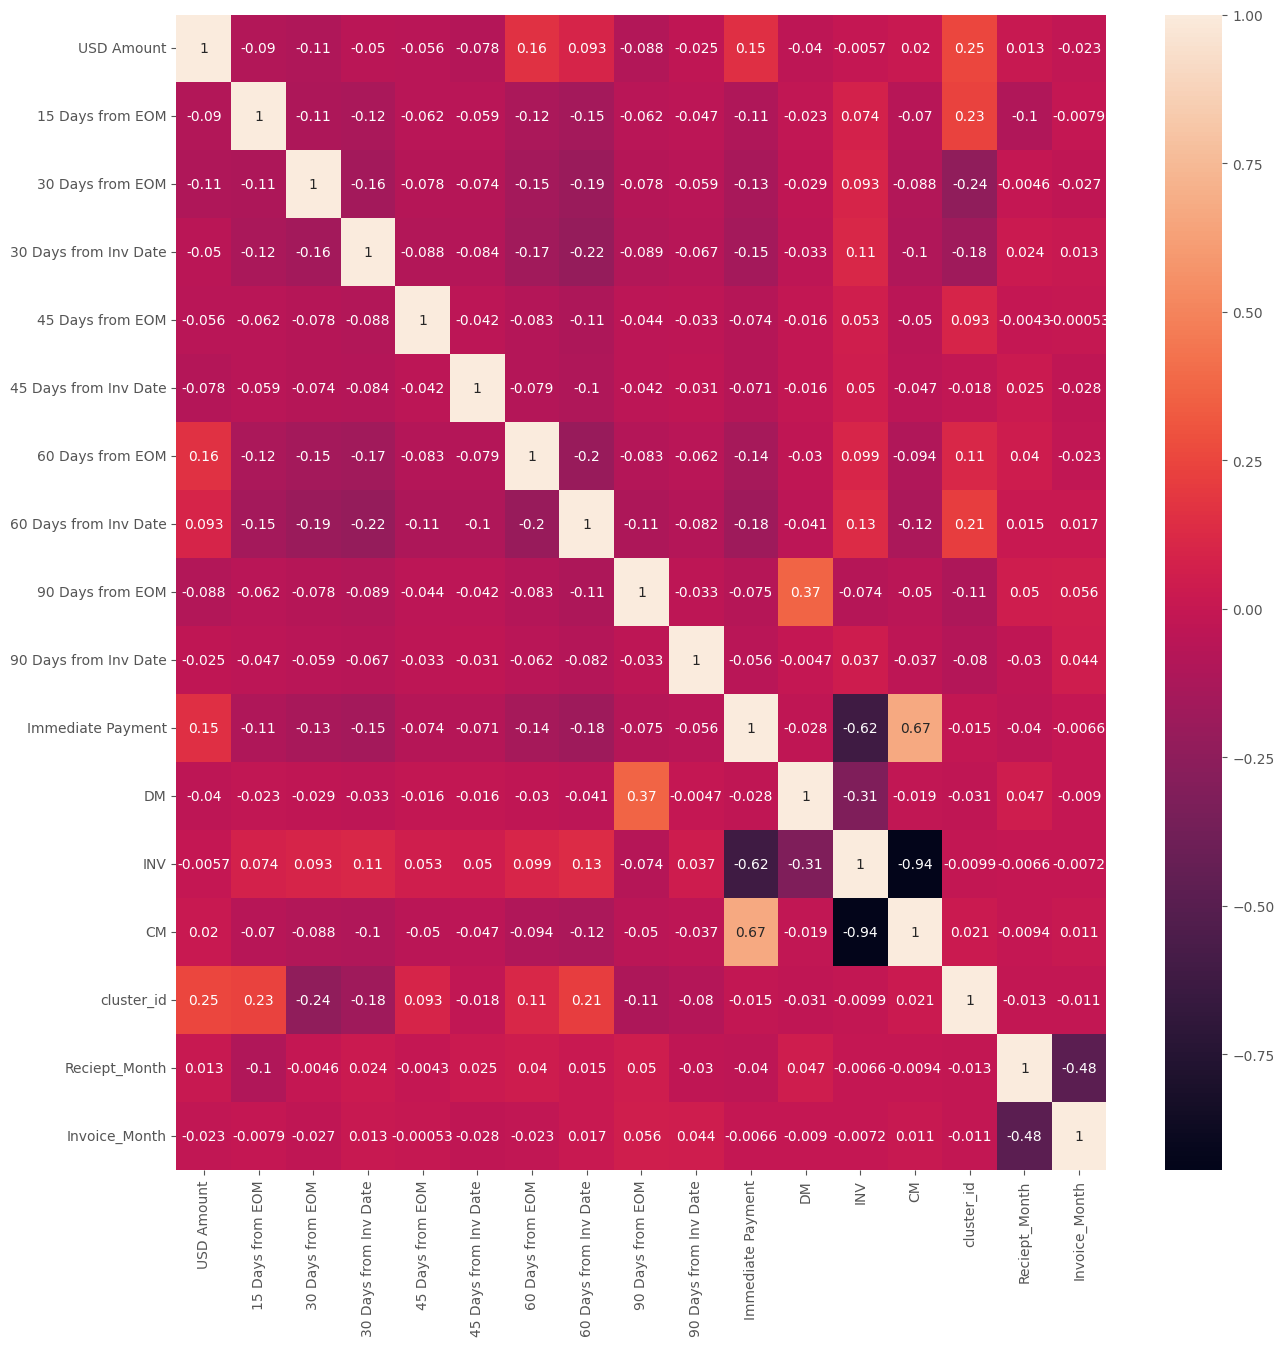

In [338]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

# Model building

In [339]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64967 entries, 52625 to 15795
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   USD Amount             64967 non-null  float64
 1   15 Days from EOM       64967 non-null  uint8  
 2   30 Days from EOM       64967 non-null  uint8  
 3   30 Days from Inv Date  64967 non-null  uint8  
 4   45 Days from EOM       64967 non-null  uint8  
 5   45 Days from Inv Date  64967 non-null  uint8  
 6   60 Days from EOM       64967 non-null  uint8  
 7   60 Days from Inv Date  64967 non-null  uint8  
 8   90 Days from EOM       64967 non-null  uint8  
 9   90 Days from Inv Date  64967 non-null  uint8  
 10  Immediate Payment      64967 non-null  uint8  
 11  DM                     64967 non-null  uint8  
 12  INV                    64967 non-null  uint8  
 13  CM                     64967 non-null  uint8  
 14  cluster_id             64967 non-null  int64  
 15

In [340]:
import statsmodels.api as sm

In [341]:
logml = sm.GLM(y_train.astype(int),(sm.add_constant(X_train)),family = sm.families.Binomial())
res=logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               LATE_PAY   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64950
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29760.
Date:                Mon, 09 Oct 2023   Deviance:                       59520.
Time:                        14:56:39   Pearson chi2:                 6.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3101
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0847      0.078     -1.091      0.275      -0.237       0.067
USD Amount               -0.0925      0.012     -7.736      0.000      -0.116      -0.069
15 Days from EOM          2.7396      0.107     25.499      0.000       2.529       2.950
30 Days from EOM         -2.3469      0.053    -43.902      0.000      -2.452      -2.242
30 Days from Inv Date     0.1922      0.052      3.671      0.000       0.090       0.295
45 Days from EOM          0.3870      0.070      5.524      0.000       0.250       0.524
45 Days from Inv Date    -0.3867      0.064     -6.057      0.000      -0.512      -0.262
60 Days from EOM         -2.2613      0.054    -42.109      0.000      -2.367      -2.156
60 Days from Inv Date    -0.3240      0.051     -6.326      0.000      -0.424      -0.224
90 Days from EOM         -0.8824      0.064    -13.860      0.000      -1.007      -0.758
90 Days from Inv Date    -1.0659      0.070    -15.322      0.000      -1.202      -0.930
Immediate Payment         3.6984      0.168     21.988      0.000       3.369       4.028
DM                        1.4771      0.134     11.022      0.000       1.214       1.740
INV                      -0.2857      0.066     -4.325      0.000      -0.415      -0.156
CM                       -1.2761      0.155     -8.228      0.000      -1.580      -0.972
cluster_id                0.1323      0.011     11.646      0.000       0.110       0.155
Reciept_Month             0.1870      0.007     26.924      0.000       0.173       0.201
Invoice_Month             0.1385      0.003     46.068      0.000       0.133       0.144
=========================================================================================
"""

In [342]:
## Predicted values for train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

52625    0.299162
29115    0.699532
80920    0.959220
55019    0.396627
82266    0.809380
16093    0.994641
54916    0.396627
15532    0.291096
2618     0.787582
79771    0.566606
dtype: float64

In [343]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29916214, 0.69953214, 0.95921975, 0.39662741, 0.80937983,
       0.99464099, 0.39662741, 0.29109556, 0.78758155, 0.56660612])

In [344]:
y_eval = pd.DataFrame({'LP':y_train.values, 'LP_pred':y_train_pred})
y_eval.head()

,LP,LP_pred
0,0,0.299162
1,0,0.699532
2,1,0.959220
3,1,0.396627
4,0,0.809380


In [345]:
y_eval['final_pred'] = y_eval['LP_pred'].map(lambda x:1 if x>0.5 else 0)
y_eval.head()

,LP,LP_pred,final_pred
0,0,0.299162,0
1,0,0.699532,1
2,1,0.959220,1
3,1,0.396627,0
4,0,0.809380,1


In [346]:
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [347]:
confusion = metrics.confusion_matrix(y_eval.LP, y_eval.final_pred)
confusion

array([[13160,  9189],
       [ 4759, 37859]])

In [348]:
# Accuracy
metrics.accuracy_score(y_eval.LP, y_eval.final_pred)

0.7853063863192082

# Multicollinearity

In [349]:
vif =pd.DataFrame()
X = add_constant(X_train)
vif = pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)
vif.sort_values(ascending=True)

const                    0.000000
USD Amount               1.190385
Invoice_Month            1.326843
Reciept_Month            1.339538
cluster_id               1.350664
90 Days from Inv Date    1.555199
45 Days from Inv Date    1.855240
45 Days from EOM         1.981117
90 Days from EOM         2.106268
15 Days from EOM         2.891386
30 Days from EOM         3.465584
60 Days from EOM         3.845815
30 Days from Inv Date    3.975577
Immediate Payment        4.260238
60 Days from Inv Date    5.043941
DM                            inf
INV                           inf
CM                            inf
dtype: float64

In [350]:
X_train.drop(columns=['DM','INV','CM','60 Days from EOM'],axis=1,inplace=True)
X_train.shape

(64967, 13)

In [351]:
logml = sm.GLM(y_train.astype(int),(sm.add_constant(X_train)),family = sm.families.Binomial())
res=logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               LATE_PAY   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30877.
Date:                Mon, 09 Oct 2023   Deviance:                       61755.
Time:                        14:56:41   Pearson chi2:                 6.60e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8734      0.044    -42.796      0.000      -1.959      -1.788
USD Amount               -0.1680      0.011    -15.034      0.000      -0.190      -0.146
15 Days from EOM          4.4419      0.099     44.944      0.000       4.248       4.636
30 Days from EOM         -0.7274      0.035    -21.000      0.000      -0.795      -0.659
30 Days from Inv Date     1.8296      0.033     56.038      0.000       1.766       1.894
45 Days from EOM          2.0789      0.056     37.161      0.000       1.969       2.189
45 Days from Inv Date     1.2491      0.049     25.611      0.000       1.154       1.345
60 Days from Inv Date     1.4100      0.028     50.521      0.000       1.355       1.465
90 Days from EOM          0.9292      0.047     19.959      0.000       0.838       1.020
90 Days from Inv Date     0.5794      0.056     10.354      0.000       0.470       0.689
Immediate Payment         4.8696      0.096     50.588      0.000       4.681       5.058
cluster_id                0.0548      0.011      5.059      0.000       0.034       0.076
Reciept_Month             0.1751      0.007     25.847      0.000       0.162       0.188
Invoice_Month             0.1284      0.003     44.095      0.000       0.123       0.134
=========================================================================================
"""

In [352]:
confusion = metrics.confusion_matrix(y_eval.LP, y_eval.final_pred)
confusion

array([[13160,  9189],
       [ 4759, 37859]])

In [353]:
# Accuracy
metrics.accuracy_score(y_eval.LP, y_eval.final_pred)

0.7853063863192082

In [354]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN= confusion[1,0]

In [355]:
# Sensitivity seems a better measure here
sensitivity = TP/float(FP+TP)
sensitivity

0.804688828430539

# Observation

In [356]:
vif =pd.DataFrame()
X = add_constant(X_train)
vif = pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)
vif.sort_values(ascending=False)

const                    19.135965
60 Days from Inv Date     1.760468
30 Days from Inv Date     1.623953
30 Days from EOM          1.568191
Immediate Payment         1.466166
15 Days from EOM          1.444937
Reciept_Month             1.337191
Invoice_Month             1.324711
cluster_id                1.322599
90 Days from EOM          1.225458
45 Days from EOM          1.208541
45 Days from Inv Date     1.184134
USD Amount                1.152220
90 Days from Inv Date     1.124897
dtype: float64

# Random Forest

In [357]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


In [358]:
reg.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Reciept_Month', 'Invoice_Month'],
      dtype='object')

In [359]:
# creating X and y
X= reg
y= merged['LATE_PAY']

In [360]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)


In [361]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [362]:
y_train_pred_rf = rf.predict(X_train_rf)

In [363]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9690505603492203
Standard deviation: 0.0017935039976631918


In [364]:
y_test_pred_rf = rf.predict(X_test_rf) # Creating y_pred for test data


In [365]:
accuracy = metrics.accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9529
           1       0.94      0.97      0.96     18315

    accuracy                           0.94     27844
   macro avg       0.94      0.93      0.93     27844
weighted avg       0.94      0.94      0.94     27844

Accuracy is :  0.940094813963511


In [178]:
#### Using Grid search for hyper-parameter tuning.
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42) # Classifier Object

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)


grid_search.fit(X_train_rf, y_train_rf)


# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best f1 score: 0.9546171793827577
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22349
           1       0.96      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967



In [179]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9529
           1       0.94      0.97      0.96     18315

    accuracy                           0.94     27844
   macro avg       0.94      0.93      0.93     27844
weighted avg       0.94      0.94      0.94     27844



In [180]:
# Having a look at feature importance

importances = best_rf.feature_importances_
sorted_idx = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importances[idx]:.3f})")


Feature ranking:
1. USD Amount (0.233)
2. Invoice_Month (0.204)
3. Reciept_Month (0.139)
4. 60 Days from EOM (0.108)
5. 30 Days from EOM (0.107)
6. cluster_id (0.052)
7. Immediate Payment (0.046)
8. 15 Days from EOM (0.032)
9. 60 Days from Inv Date (0.018)
10. 30 Days from Inv Date (0.015)
11. 90 Days from EOM (0.012)
12. 90 Days from Inv Date (0.010)
13. 45 Days from EOM (0.006)
14. INV (0.006)
15. 45 Days from Inv Date (0.006)
16. CM (0.006)
17. DM (0.001)


# Preparing open invoice data for predictions

In [181]:
curr_df_neg_age = curr_df[curr_df['AGE'] < 0]
curr_df_neg_age.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Due Date,Transaction Currency,Local Amount,AGE,...,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,2022-04-23,USD,"2,000",-18,...,0,0,0,0,0,0,0,0,1,0
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,2022-04-30,AED,"3,800",-25,...,0,0,0,0,0,0,0,0,1,0
5,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000106,03/03/2022,2022-04-30,AED,"1,264",-25,...,0,0,0,0,0,0,0,0,1,0
6,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000124,15/03/2022,2022-04-30,AED,"25,858",-25,...,0,0,0,0,0,0,0,0,1,0
7,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000125,15/03/2022,2022-04-30,AED,"39,873",-25,...,0,0,0,0,0,0,0,0,1,0


In [182]:
curr_df_final = curr_df_neg_age.copy()

In [183]:
curr_df_final.drop(['Customer_Name','AGE'], axis= 1, inplace= True) # Dropping Customer Name and Age column


In [184]:
curr_df_final['Invoice_Month'] = curr_df_final['INV_CREATION_DATE'].dt.month # Extracting Month


In [185]:
curr_df_final.head()

,AS_OF_DATE,Customer Type,Customer Account No,Transaction Number,Transaction Date,Due Date,Transaction Currency,Local Amount,USD Amount,INV_CREATION_DATE,...,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,Invoice_Month
2,04-APR-2022 01:07:01,Related Party,23152.0,100220000143,24/03/2022,2022-04-23,USD,"2,000",2000,2022-03-24 17:46:00,...,0,0,0,0,0,0,0,1,0,3
4,04-APR-2022 01:07:01,Related Party,7530.0,100220000105,03/03/2022,2022-04-30,AED,"3,800",3800,2022-03-03 22:30:00,...,0,0,0,0,0,0,0,1,0,3
5,04-APR-2022 01:07:01,Related Party,7530.0,100220000106,03/03/2022,2022-04-30,AED,"1,264",1264,2022-03-03 22:30:00,...,0,0,0,0,0,0,0,1,0,3
6,04-APR-2022 01:07:01,Related Party,7530.0,100220000124,15/03/2022,2022-04-30,AED,"25,858",25858,2022-03-15 19:06:00,...,0,0,0,0,0,0,0,1,0,3
7,04-APR-2022 01:07:01,Related Party,7530.0,100220000125,15/03/2022,2022-04-30,AED,"39,873",39873,2022-03-15 19:06:00,...,0,0,0,0,0,0,0,1,0,3


In [186]:
# dropping due_date and invoice creation date

curr_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)


In [187]:
curr_df_final.head()

,AS_OF_DATE,Customer Type,Customer Account No,Transaction Number,Transaction Date,Transaction Currency,Local Amount,USD Amount,15 Days from EOM,30 Days from EOM,...,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,Invoice_Month
2,04-APR-2022 01:07:01,Related Party,23152.0,100220000143,24/03/2022,USD,"2,000",2000,0,0,...,0,0,0,0,0,0,0,1,0,3
4,04-APR-2022 01:07:01,Related Party,7530.0,100220000105,03/03/2022,AED,"3,800",3800,0,1,...,0,0,0,0,0,0,0,1,0,3
5,04-APR-2022 01:07:01,Related Party,7530.0,100220000106,03/03/2022,AED,"1,264",1264,0,1,...,0,0,0,0,0,0,0,1,0,3
6,04-APR-2022 01:07:01,Related Party,7530.0,100220000124,15/03/2022,AED,"25,858",25858,0,1,...,0,0,0,0,0,0,0,1,0,3
7,04-APR-2022 01:07:01,Related Party,7530.0,100220000125,15/03/2022,AED,"39,873",39873,0,1,...,0,0,0,0,0,0,0,1,0,3


In [188]:
# Dropping cluster_id and Receipt Month from modeling data
X_train_final.drop(['cluster_id','Reciept_Month'], axis= 1, inplace= True)
X_test_final.drop(['cluster_id','Reciept_Month'], axis= 1, inplace= True)


NameError: ignored

In [ ]:
X_train_final.head()

In [ ]:
# Logistic Regression
logml = sm.GLM(y_train_final.astype(int),(sm.add_constant(X_train_final)),family = sm.families.Binomial())
res=logml.fit()
res.summary()

# Finding the best threshold on the basis of f2 score

In [ ]:
probas = res.predict(sm.add_constant(X_train_final))

probas

In [ ]:
proba_df= pd.DataFrame(data= {'y_actual': y_train_final,'y_prob':probas})
proba_df

In [ ]:
# trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    proba_df[f'y_pred_{i}'] = proba_df['y_prob'].apply(lambda x : 1 if x > i else 0)
proba_df

In [ ]:
# Creating a dictionary of all scores
scores= {}
for i in proba_df.columns[2:]:
    preds = proba_df['y_prob'].apply(lambda x : 1 if x > float(i[-3:]) else 0)
    scores[i]= {'Precision': metrics.precision_score(proba_df['y_actual'], preds),
                'Recall':metrics.recall_score(proba_df['y_actual'], preds),
                'Accuracy':metrics.accuracy_score(proba_df['y_actual'], preds)}


In [ ]:
# creating a dataframe

scores_df = pd.DataFrame(data= scores)
scores_df

In [ ]:
# plotting the socres of different threshold values
plt.figure(figsize= (10,10))

plt.plot(scores_df.loc['Precision'], color= 'red', label= 'Precision')
plt.plot(scores_df.loc['Recall'], color= 'green', label= 'Recall')
plt.plot(scores_df.loc['Accuracy'], color= 'blue', label= 'Accuracy')

plt.title('Precision, Recall, and Accuracy')

plt.legend(loc= 'best')

plt.show()

In [ ]:
# Plotting a roc auc curve

from sklearn.metrics import roc_curve, auc

# y_true and y_pred_proba are the true labels and predicted probabilities, respectively
fpr, tpr, thresholds = roc_curve(proba_df['y_actual'], proba_df['y_prob'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# predicting y_train_values with threshold of 0.5
y_train_pred_thresh_final = res.predict(sm.add_constant(X_train_final)).apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_thresh_final

In [ ]:
# Printing the classification report

print(classification_report(y_train_final, y_train_pred_thresh_final))

In [ ]:
# Checking if our model is overfitting

y_test_pred_thresh_final = res.predict(sm.add_constant(X_test_final)).apply(lambda x : 1 if x > 0.5 else 0)
y_test_pred_thresh_final

In [ ]:
# Printing the classification report

print(classification_report(y_test_final, y_test_pred_thresh_final))

In [ ]:
curr_df_final = curr_df_final[X_train_final.columns] # fixing the order of columns


In [ ]:
open_inv_final_pred = res.predict(sm.add_constant(curr_df_final)) # Predicting probability values
open_inv_final_pred

# Final Probability

In [ ]:
curr_df_neg_age['prob_late_pay'] = open_inv_final_pred
curr_df_neg_age

In [ ]:
customer_seg_prob= pd.DataFrame(curr_df_neg_age.groupby('Customer_Name').prod()['prob_late_pay'].round(4))
customer_seg_prob

In [ ]:
customer_seg_prob.rename({'prob_late_pay':'prob_logreg'}, inplace= True, axis= 1)
customer_seg_prob

# Using Random Forest to get predictions directly

In [ ]:
# Using randomized search cv to find the best params
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Define the random search object
rs = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Fit the random search object to the data
rs.fit(X_train_final, y_train_final)

# Print the best hyperparameters and score
print("Best hyperparameters:", rs.best_params_)
print("Best F1 score:", rs.best_score_)

best_rf= rs.best_estimator_

In [ ]:
y_train_pred_rf = best_rf.predict(X_train_final) # predicting y train

# printing classification report

print(classification_report(y_train_final, y_train_pred_rf))

In [ ]:
y_test_pred_rf = best_rf.predict(X_test_final) # Predicting y test

# Printing classification report

print(classification_report(y_test_final, y_test_pred_rf))

In [ ]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(curr_df_final)[:,1]

y_open_invoices

In [ ]:
curr_df_neg_age['Pred_rf'] = y_open_invoices

In [ ]:
curr_df_neg_age.head()

In [ ]:
## Grouping by Customer Name and using mean to find the probability of the customer will make late payment

customer_seg_prob['Prob_rf'] = curr_df_neg_age.groupby('Customer_Name').mean()['Pred_rf']
customer_seg_prob